# Import required libraries

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the data

In [2]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('data.csv')

In [3]:
# View the data
df.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,...,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1722,0,35,-1,79,10,1,21,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

In [5]:
df.describe()

,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
count,99999.000000,99999.000000,99999.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.0,99999.000000,99999.000000,99999.000000,99999.000000
mean,1004.967550,0.289943,1.01639,0.329453,18857.231732,318.834548,60.278743,2114.613036,1.439904,227.234932,53292.001950,83.163542,10.0,2.592836,25.485755,11.300673,0.169802
std,1.091916,0.505707,0.53110,0.854673,4944.919482,21.510752,47.713436,607.469442,1.326824,351.472366,49952.340367,70.161076,0.0,1.723003,2.968520,5.938725,0.375460
min,1001.000000,0.000000,0.00000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000,10.0,0.000000,21.000000,0.000000,0.000000
25%,1005.000000,0.000000,1.00000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000,10.0,1.000000,23.000000,7.000000,0.000000
50%,1005.000000,0.000000,1.00000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100050.000000,61.000000,10.0,2.000000,26.000000,11.000000,0.000000
75%,1005.000000,1.000000,1.00000,0.000000,21893.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100093.000000,101.000000,10.0,4.000000,28.000000,16.000000,0.000000
max,1012.000000,7.000000,5.00000,5.000000,24043.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000,10.0,6.000000,30.000000,23.000000,1.000000


In [6]:
df.isnull().sum()

click               0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
month               0
dayofweek           0
day                 0
hour                0
y                   0
dtype: int64

In [7]:
df.describe(include = 'all')

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
count,99999,99999.000000,99999.000000,99999,99999,99999,99999,99999,99999,99999,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.0,99999.000000,99999.000000,99999.000000,99999.000000
unique,2,NaN,NaN,1485,1331,19,1354,96,21,16801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,False,NaN,NaN,85f751fd,c4e18dd6,50e219e0,ecad2386,7801e8d9,07d7df22,a99f214a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,83019,NaN,NaN,36022,37362,40839,63977,67464,64769,82579,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1004.967550,0.289943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2114.613036,1.439904,227.234932,53292.001950,83.163542,10.0,2.592836,25.485755,11.300673,0.169802
std,NaN,1.091916,0.505707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,607.469442,1.326824,351.472366,49952.340367,70.161076,0.0,1.723003,2.968520,5.938725,0.375460
min,NaN,1001.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,112.000000,0.000000,33.000000,-1.000000,1.000000,10.0,0.000000,21.000000,0.000000,0.000000
25%,NaN,1005.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1863.000000,0.000000,35.000000,-1.000000,23.000000,10.0,1.000000,23.000000,7.000000,0.000000
50%,NaN,1005.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2323.000000,2.000000,39.000000,100050.000000,61.000000,10.0,2.000000,26.000000,11.000000,0.000000
75%,NaN,1005.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2526.000000,3.000000,171.000000,100093.000000,101.000000,10.0,4.000000,28.000000,16.000000,0.000000


# Discriptive Analysis Result

0    83019
1    16980
Name: y, dtype: int64
positive sample count : 0.17


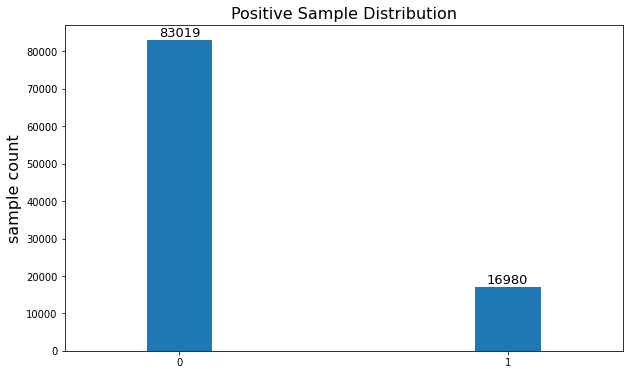

In [8]:
df_click = df['y'].value_counts() # y represent the click here
print(df_click)
pos_proportion = df_click[1]/(df_click[1] + df_click[0])
neg_proportion = df_click[0]/(df_click[1] + df_click[0])
print('positive sample count : %.2f'%(pos_proportion))

#Visualization
plt.figure(figsize=(10,6))
df_click.plot(kind ='bar', width =0.2, rot =0)
plt.title('Positive Sample Distribution', fontsize=16)
plt.ylabel('sample count', fontsize=16)

for x,y in enumerate(df_click.values):
    plt.text(x,y+1000, '%s'%y, ha ='center', fontsize=13)
    plt.savefig('./Sample_Distribution')

In [9]:
print(df[['dayofweek','hour']])

       dayofweek  hour
0              1    14
1              2    19
2              3    18
3              2    19
4              1     8
...          ...   ...
99994          3    15
99995          2     0
99996          2    15
99997          5     8
99998          1     1

[99999 rows x 2 columns]


     dayofweek_  hour_  click_sum  click_count  click_rate
0             0      0         19          140    0.135714
1             0      1         43          195    0.220513
2             0      2         41          203    0.201970
3             0      3         41          277    0.148014
4             0      4         68          335    0.202985
..          ...    ...        ...          ...         ...
163           6     19         44          274    0.160584
164           6     20         32          247    0.129555
165           6     21         32          204    0.156863
166           6     22         25          190    0.131579
167           6     23         29          188    0.154255

[168 rows x 5 columns]


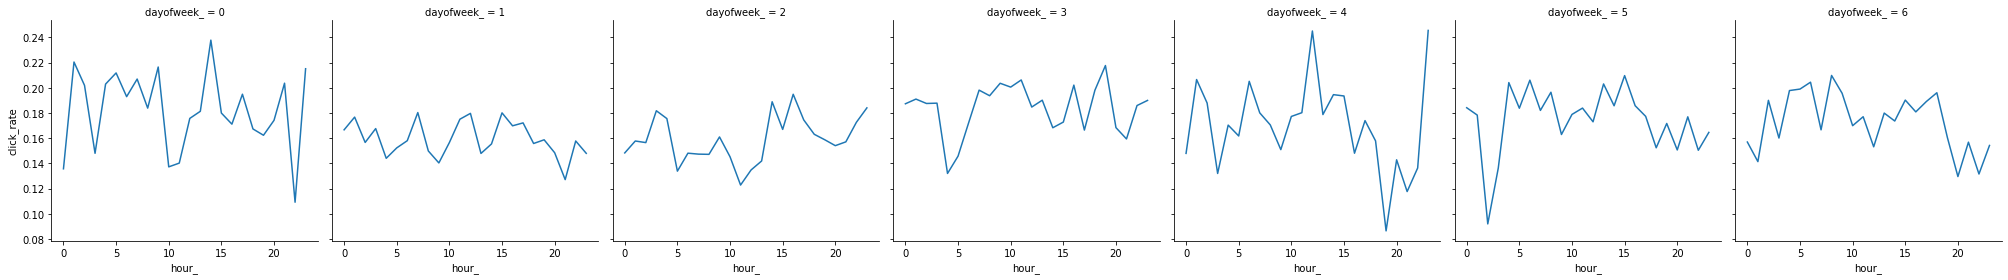

In [10]:
data_df = df.groupby(by=["dayofweek","hour"])[["click"]].agg(['sum','count']).reset_index()
data_df.columns = ["_".join(x) for x in data_df.columns.ravel()]
data_df['click_rate']=data_df.click_sum/data_df.click_count
print(data_df)
g = sns.FacetGrid(data_df, col="dayofweek_", col_wrap=7, height=4)
g.map(sns.lineplot, "hour_", "click_rate")
plt.show()

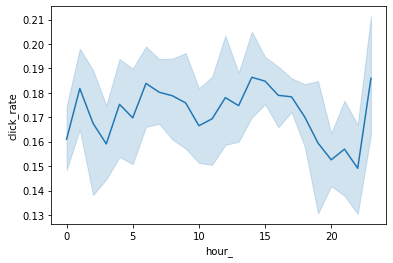

In [11]:
g3 = sns.lineplot(data =data_df, x='hour_', y='click_rate')

In [12]:
X = df.drop(['click','y'],axis=1)
y = df.y

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [14]:
num_cols = X.select_dtypes(include = ['int','float']).columns.tolist()
categorical_cols = X.select_dtypes(include = ['object']).columns.tolist()
print(num_cols)
print(categorical_cols)

['C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'month', 'dayofweek', 'day', 'hour']
['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model']


# Hashing

In [15]:
X_train.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,...,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour
27322,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,6781d842,...,50,1722,0,35,-1,79,10,0,27,19
31187,1005,1,ce3307ec,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,af9205f9,...,50,2707,3,937,100156,61,10,2,29,17
65409,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ceffea69,...,50,2545,0,167,-1,221,10,1,28,11
14297,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,0f2161f8,a99f214a,88bf6cc1,...,50,2478,3,167,100074,23,10,1,21,17
15664,1005,0,12fb4121,6b59f079,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,086ef670,...,50,2683,1,163,-1,212,10,1,28,19


In [16]:
for col in categorical_cols:
    X_train[col] = X_train[col].apply(lambda x: hash(x))
    
for col in categorical_cols:
    X_test[col] = X_test[col].apply(lambda x:hash(x))

In [17]:
X_train.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,...,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour
27322,1005,0,-2814053845743343831,-6929715331500194067,-5739924142414539089,-1556651796373363111,-7455903038245905666,2670229662212279639,-2186415483827021020,-7735587214846965533,...,50,1722,0,35,-1,79,10,0,27,19
31187,1005,1,2048932646292118921,-5565726343947980575,-8035360725303477681,-1556651796373363111,-7455903038245905666,2670229662212279639,-2186415483827021020,2237450068629907611,...,50,2707,3,937,100156,61,10,2,29,17
65409,1005,0,-2814053845743343831,-6929715331500194067,-5739924142414539089,-1556651796373363111,-7455903038245905666,2670229662212279639,-2186415483827021020,-7554676640811857330,...,50,2545,0,167,-1,221,10,1,28,11
14297,1005,0,189047889348629022,1638991584857224953,6678749959606416243,-3780050433727759912,8079064386863757697,-6167972388852241393,-2186415483827021020,5952412965932304068,...,50,2478,3,167,100074,23,10,1,21,17
15664,1005,0,989506469747801740,2121195597695180412,-8035360725303477681,-1556651796373363111,-7455903038245905666,2670229662212279639,-2186415483827021020,639805245390836523,...,50,2683,1,163,-1,212,10,1,28,19


# Scaling the Numerical Values

In [18]:
std = StandardScaler()
X_train[num_cols] = std.fit_transform(X_train[num_cols])
X_test[num_cols] = std.transform(X_test[num_cols])

In [19]:
X_train['user_info'] = X_train.device_ip + X_train.device_model + X_train.device_id
X_train = X_train.drop(['device_id','device_ip','device_model','hour'],axis=1)
    
X_train['device_info'] = X_train.device_type + X_train.banner_pos + X_train.device_conn_type
X_train = X_train.drop(['banner_pos','device_conn_type','device_type'],axis=1)

X_test['user_info'] = X_test.device_ip + X_test.device_model + X_test.device_id
X_test = X_test.drop(['device_id','device_ip','device_model','hour'],axis=1)
    
X_test['device_info'] = X_test.device_type + X_test.banner_pos + X_test.device_conn_type
X_test = X_test.drop(['banner_pos','device_conn_type','device_type'],axis=1)

# Model - Decision Tree Classifier

In [20]:
X_train.head()

,C1,site_id,site_domain,site_category,app_id,app_domain,app_category,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,user_info,device_info
27322,0.030123,-2814053845743343831,-6929715331500194067,-5739924142414539089,-1556651796373363111,-7455903038245905666,2670229662212279639,-0.632827,0.049021,-0.214499,-0.640246,-1.087399,-0.544295,-1.067334,-0.060375,0.0,-1.504833,0.508938,-2136041645755828408,-0.993763
31187,0.030123,2048932646292118921,-5565726343947980575,-8035360725303477681,-1556651796373363111,-7455903038245905666,2670229662212279639,0.964509,0.049021,-0.214499,0.975355,1.172178,2.038489,0.937782,-0.316166,0.0,-0.344404,1.182725,611645090227455659,0.990366
65409,0.030123,-2814053845743343831,-6929715331500194067,-5739924142414539089,-1556651796373363111,-7455903038245905666,2670229662212279639,0.688140,0.049021,-0.214499,0.709642,-1.087399,-0.166327,-1.067334,1.957534,0.0,-0.924618,0.845832,-8570809222658782101,-0.993763
14297,0.030123,189047889348629022,1638991584857224953,6678749959606416243,-3780050433727759912,8079064386863757697,-6167972388852241393,0.554290,0.049021,-0.214499,0.599749,1.172178,-0.166327,0.936141,-0.856170,0.0,-0.924618,-1.512424,-476874434032109257,-0.993763
15664,0.030123,989506469747801740,2121195597695180412,-8035360725303477681,-1556651796373363111,-7455903038245905666,2670229662212279639,0.925806,0.049021,-0.214499,0.935991,-0.334207,-0.177781,-1.067334,1.829639,0.0,-0.924618,0.845832,-3308164634419488152,-0.993763


In [21]:
tree = DecisionTreeClassifier(max_depth = 10)
tree.fit(X_train,y_train)
print('Train Score:',tree.score(X_train,y_train))
print('Test Score:',tree.score(X_test,y_test))

Train Score: 0.8416405948656409
Test Score: 0.8286


In [22]:
from sklearn.metrics import roc_curve,confusion_matrix,precision_score,recall_score,roc_auc_score
y_score = tree.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])
roc_auc_score = roc_auc_score(y_test,y_score[:,1])
print(roc_auc_score)

0.6852287803349616


In [23]:
y_pred = tree.predict(X_test)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
print("Precision: %s, Recall: %s" %(precision, recall))

Precision: 0.7797320234374608, Recall: 0.8286


In [24]:
matrix = confusion_matrix(y_test,y_pred)
tn, fp, fn, tp = matrix.ravel()
print(matrix)

[[24379   509]
 [ 4633   479]]


In [25]:
for max_depth_val in [2, 3, 5, 10, 15, 20]:
    clf = DecisionTreeClassifier(max_depth = max_depth_val)
    print("Evaluating tree with max_depth = %s" %(max_depth_val))
    y_pred = tree.fit(X_train,y_train).predict(X_test) 
    print("Confusion matrix: ")
    print(confusion_matrix(y_test, y_pred))
    prec = precision_score(y_test, y_pred, average = 'weighted')
    recall = recall_score(y_test, y_pred, average = 'weighted')
    print("Precision: %s, Recall: %s" %(prec, recall))

Evaluating tree with max_depth = 2
Confusion matrix: 
[[24379   509]
 [ 4636   476]]
Precision: 0.7793925732445409, Recall: 0.8285
Evaluating tree with max_depth = 3
Confusion matrix: 
[[24384   504]
 [ 4634   478]]
Precision: 0.7800620671852109, Recall: 0.8287333333333333
Evaluating tree with max_depth = 5
Confusion matrix: 
[[24374   514]
 [ 4640   472]]
Precision: 0.7784988396033475, Recall: 0.8282
Evaluating tree with max_depth = 10
Confusion matrix: 
[[24376   512]
 [ 4641   471]]
Precision: 0.7785595636416314, Recall: 0.8282333333333334
Evaluating tree with max_depth = 15
Confusion matrix: 
[[24376   512]
 [ 4639   473]]
Precision: 0.7787878121503755, Recall: 0.8283
Evaluating tree with max_depth = 20
Confusion matrix: 
[[24386   502]
 [ 4636   476]]
Precision: 0.7800139301135208, Recall: 0.8287333333333333


In [26]:
from sklearn.model_selection import KFold,cross_val_score
for max_depth_val in [3, 5, 10]:
    k_fold = KFold(n_splits = 4)
    clf = DecisionTreeClassifier(max_depth = max_depth_val)
    print("Evaluating Decision Tree for max_depth = %s" %(max_depth_val))
    pred_dtree = tree.fit(X_train, y_train).predict(X_test) 
  
    cv_precision = cross_val_score(clf, X_train, y_train, cv = k_fold, scoring = 'recall_weighted')
    precision = recall_score(y_test, pred_dtree, average = 'weighted')
    print("Cross validation Recall: %s" %(cv_precision.mean()))
    print("Test Recall: %s" %(precision.mean()))

Evaluating Decision Tree for max_depth = 3
Cross validation Recall: 0.8304118806788958
Test Recall: 0.8286666666666667
Evaluating Decision Tree for max_depth = 5
Cross validation Recall: 0.8307404431273624
Test Recall: 0.8287333333333333
Evaluating Decision Tree for max_depth = 10
Cross validation Recall: 0.8270832659825459
Test Recall: 0.8288


In [27]:
print(classification_report(y_test,pred_dtree))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90     24888
           1       0.49      0.09      0.16      5112

    accuracy                           0.83     30000
   macro avg       0.66      0.54      0.53     30000
weighted avg       0.78      0.83      0.78     30000



# Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [10], 
    'n_estimators':[2,5,10,20,50],
    'min_samples_split': [2, 3, 4],
    'max_features' : ['log2']
}

rf = RandomForestClassifier(random_state=42)

rf_search = RandomizedSearchCV(estimator = rf, param_distributions=param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2, n_iter = 10)

model = rf_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [29]:
rf_search.best_params_

{'n_estimators': 10,
 'min_samples_split': 2,
 'max_features': 'log2',
 'max_depth': 10,
 'bootstrap': True}

In [30]:
clf_rf = RandomForestClassifier(n_estimators= 20,
 min_samples_split= 2,
 max_features= 'log2',
 max_depth= 10,
 bootstrap= True,
 random_state=42)
clf_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=20,
                       random_state=42)

In [31]:
rf_predict = clf_rf.predict(X_test)

print(confusion_matrix(y_test, rf_predict))
prec = precision_score(y_test, rf_predict, average = 'weighted')
recall = recall_score(y_test, rf_predict, average = 'weighted')
print("Precision: %s, Recall: %s" %(prec, recall))

[[24656   232]
 [ 4820   292]]
Precision: 0.7888971555070292, Recall: 0.8316


In [32]:
rf_prob = clf_rf.predict_proba(X_test)
rf_fpr,rf_tpr,_ = roc_curve(y_test,rf_prob[:,1])

In [33]:
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     24888
           1       0.56      0.06      0.10      5112

    accuracy                           0.83     30000
   macro avg       0.70      0.52      0.51     30000
weighted avg       0.79      0.83      0.77     30000



# Boosting

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
recall_gbc = round(recall_score(y_test, gbc_pred),4)
precision_gbc = round(precision_score(y_test, gbc_pred),4)

print('Recall :\t {}'.format(recall_gbc))
print('Precision :\t {}:'.format(precision_gbc))

Recall :	 0.0395
Precision :	 0.6235:


In [35]:
roc_auc_score = metrics.roc_auc_score(y_test,gbc_pred)
print(roc_auc_score)
print(gbc.score(X_test,y_test))
gbc_fpr,gbc_tpr,_ = roc_curve(y_test,gbc_pred)

0.517306453097671
0.8322666666666667


In [36]:
from sklearn.model_selection import KFold,cross_val_score
# Set up k-fold
k_fold = KFold(n_splits = 5)

# Evaluate precision and recall for each fold
precision = cross_val_score(
  gbc, X_train, y_train, cv = k_fold, scoring = 'precision_weighted')
recall = cross_val_score(
  gbc, X_train, y_train, cv = k_fold, scoring = 'recall_weighted')
print("Precision scores: %s" %(precision.mean())) 
print("Recall scores: %s" %(recall.mean()))
print(k_fold)

Precision scores: 0.7983478181800743
Recall scores: 0.8322547630953231
KFold(n_splits=5, random_state=None, shuffle=False)


In [37]:
print(classification_report(y_test,gbc_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     24888
           1       0.62      0.04      0.07      5112

    accuracy                           0.83     30000
   macro avg       0.73      0.52      0.49     30000
weighted avg       0.80      0.83      0.77     30000



In [38]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

Text(0.5, 1.0, 'AUC-ROC Curve')

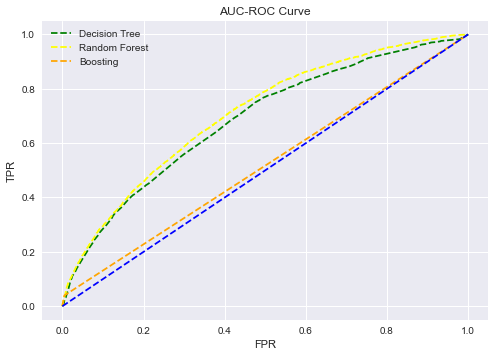

In [39]:
plt.style.use('seaborn')
plt.plot(fpr,tpr,linestyle = '--',color = 'green',label='Decision Tree')
plt.plot(rf_fpr,rf_tpr,linestyle = '--',color = 'yellow',label='Random Forest')
plt.plot(gbc_fpr,gbc_tpr,linestyle = '--',color = 'orange',label='Boosting')
plt.plot(p_fpr,p_tpr,linestyle='--',color = 'blue')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC-ROC Curve')

In [40]:
print('XGBOOST AUC-ROC',metrics.roc_auc_score(y_test,rf_predict))
print('Decision Tree',metrics.roc_auc_score(y_test,pred_dtree))
print('Random Forest',metrics.roc_auc_score(y_test,gbc_pred))

XGBOOST AUC-ROC 0.5238993696454954
Decision Tree 0.5364343998201143
Random Forest 0.517306453097671


## Feature importance - Select KBest

In [41]:
from sklearn.feature_selection import SelectKBest, f_classif
# instantiate SelectKBest to determine 20 best features
best_features = SelectKBest(score_func=f_classif, k=len(X_train.columns))
fit = best_features.fit(X_train,y_train)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X_train.columns)
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns

In [42]:
# Top 20 Feature Selection
print(feature_scores.nlargest(10,'Score')) 

     Feature_Name        Score
9             C16  1177.800317
6    app_category   469.998882
14            C21   348.961467
5      app_domain   339.296398
3   site_category   325.300439
7             C14   250.305256
10            C17   223.283114
13            C20   223.026957
2     site_domain   190.575015
19    device_info   162.044518


In [43]:
selected_feature_df = feature_scores.nlargest(10,'Score')

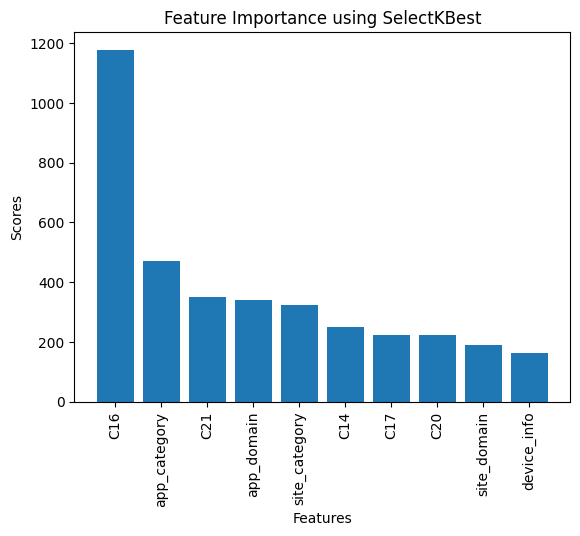

In [44]:
plt.rcdefaults()
plt.bar(selected_feature_df.Feature_Name,selected_feature_df.Score)
plt.title("Feature Importance using SelectKBest")
plt.xlabel("Features")
plt.ylabel("Scores")
plt.xticks(rotation=90)
plt.show()

In [45]:
features_selected = feature_scores.nlargest(10,'Score').Feature_Name.to_list()

In [46]:
# dropping the unwanted features
X_train = X_train[features_selected]
X_test  = X_test[features_selected]

## Principal Component Analysis

<span class="mark">Principal Component Analysis is a mathematical technique used for dimensionality reduction</span>. Its goal is to reduce the number of features whilst keeping most of the original information.

In [47]:
# initialize PCA components
pca = PCA(n_components=2)
pca.fit(X_train)
pca_X_train = pca.transform(X_train)
pca_X_test = pca.transform(X_test)

In [48]:
df_pca_X_train = pd.DataFrame(pca_X_train, columns=['PCA1', 'PCA2'])
df_pca_X_test = pd.DataFrame(pca_X_test, columns=['PCA1', 'PCA2'])

In [49]:
pca.explained_variance_ratio_

array([0.68246575, 0.13676194])

<span class="burk">The variance data shows most the data points are captured in PCA1 & PCA2 itself</span>

## K-Means Clustering

Use Elbow method to find no .of clusters to be selected

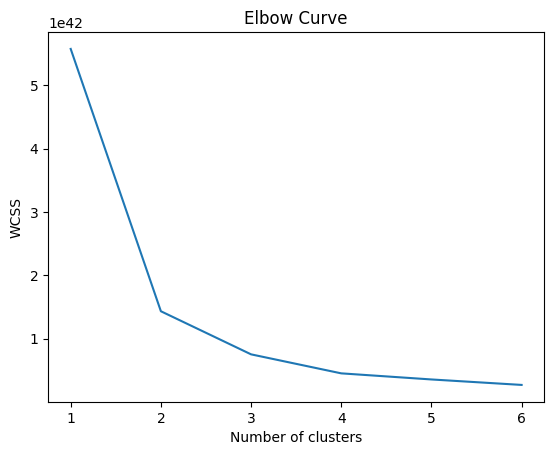

In [50]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(pca_X_train)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.rcdefaults()
plt.plot(number_clusters,wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above graph, it is evident that <span class="mark">number of clusters = 3 makes sense</span>

In [51]:
kmeans = KMeans(3)
kmeans.fit(pca_X_train, y_train)
identified_clusters = kmeans.fit_predict(pca_X_test)
identified_clusters = pd.DataFrame(identified_clusters, columns=['Cluster'])

In [52]:
identified_clusters

,Cluster
0,0
1,1
2,0
3,2
4,2
...,...
29995,1
29996,2
29997,0
29998,1


In [53]:
data_with_clusters = pca_X_test.copy()
data_with_clusters = pd.DataFrame(data_with_clusters, columns=['PCA1', 'PCA2'])
data_with_clusters['Cluster'] = identified_clusters['Cluster']

In [54]:
# check the centroids of each cluster
centroids = kmeans.cluster_centers_
centroids

array([[ 9.15952866e+18, -2.60841005e+17],
       [-7.66322581e+18, -2.16728608e+18],
       [-3.41088591e+18,  5.77791339e+18]])

In [55]:
data_with_clusters

,PCA1,PCA2,Cluster
0,1.390433e+19,-4.197490e+18,0
1,-8.628685e+18,-2.096444e+18,1
2,8.638763e+18,2.253543e+18,0
3,7.094072e+15,7.234851e+18,2
4,-5.010247e+18,7.191730e+18,2
...,...,...,...
29995,-8.628685e+18,-2.096444e+18,1
29996,-5.396439e+18,6.200413e+18,2
29997,5.130822e+18,4.756159e+18,0
29998,-7.281520e+18,-3.372348e+18,1


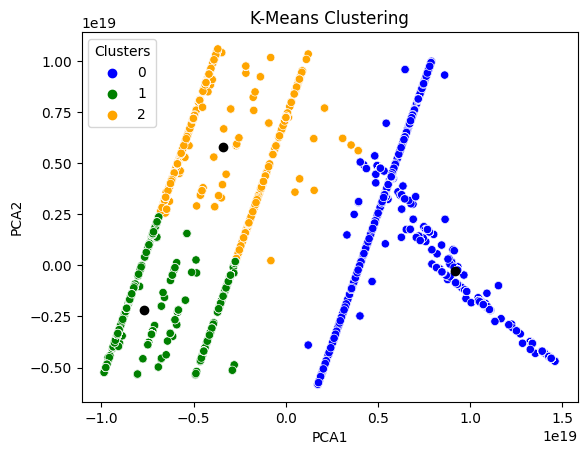

In [56]:
# plot the KMeans cluster with the Health category that is calculated
sns.scatterplot(x = 'PCA1', y='PCA2', data =data_with_clusters, hue='Cluster', palette=['blue', 'green', 'orange']).set(title="K-Means Clustering")
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.legend(title='Clusters', loc='upper left')
plt.show()

# Model Re-Evaluation After Top 10 Feature Selection

# Model - Decision Tree Classifier

In [57]:
from sklearn.model_selection import KFold,cross_val_score
for max_depth_val in [3, 5, 10]:
    k_fold = KFold(n_splits = 4)
    clf = DecisionTreeClassifier(max_depth = max_depth_val)
    print("Evaluating Decision Tree for max_depth = %s" %(max_depth_val))
    y_pred_dtree = tree.fit(X_train, y_train).predict(X_test) 
  
    cv_precision = cross_val_score(clf, X_train, y_train, cv = k_fold, scoring = 'recall_weighted')
    precision = recall_score(y_test, y_pred_dtree, average = 'weighted')
    print("Cross validation Recall: %s" %(cv_precision.mean()))
    print("Test Recall: %s" %(precision.mean()))

Evaluating Decision Tree for max_depth = 3
Cross validation Recall: 0.8304547402708726
Test Recall: 0.8315333333333333
Evaluating Decision Tree for max_depth = 5
Cross validation Recall: 0.8306833019029659
Test Recall: 0.8315666666666667
Evaluating Decision Tree for max_depth = 10
Cross validation Recall: 0.8310547410872458
Test Recall: 0.8316


In [58]:
print(classification_report(y_test,y_pred_dtree))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     24888
           1       0.55      0.07      0.12      5112

    accuracy                           0.83     30000
   macro avg       0.69      0.53      0.51     30000
weighted avg       0.79      0.83      0.77     30000



# Random Forest Classifier

In [59]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10], 
    'n_estimators':[2,5,10,20,50],
    'min_samples_split': [2, 3, 4],
    'max_features' : ['log2']
}

rf = RandomForestClassifier(random_state=42)

rf_search = RandomizedSearchCV(estimator = rf, param_distributions=param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2, n_iter = 10)

model = rf_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [60]:
rf_search.best_params_

{'n_estimators': 10,
 'min_samples_split': 2,
 'max_features': 'log2',
 'max_depth': 10,
 'bootstrap': True}

In [61]:
clf_rf = RandomForestClassifier(n_estimators= 20,
 min_samples_split= 2,
 max_features= 'log2',
 max_depth= 10,
 bootstrap= True,
 random_state=42)
clf_rf.fit(X_train,y_train)


rf_predict = clf_rf.predict(X_test)

print(confusion_matrix(y_test, rf_predict))
prec = precision_score(y_test, rf_predict, average = 'weighted')
recall = recall_score(y_test, rf_predict, average = 'weighted')
print("Precision: %s, Recall: %s" %(prec, recall))


rf_prob = clf_rf.predict_proba(X_test)
rf_fpr,rf_tpr,_ = roc_curve(y_test,rf_prob[:,1])


[[24686   202]
 [ 4811   301]]
Precision: 0.7962601207751625, Recall: 0.8329


In [62]:
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     24888
           1       0.60      0.06      0.11      5112

    accuracy                           0.83     30000
   macro avg       0.72      0.53      0.51     30000
weighted avg       0.80      0.83      0.77     30000



# Boosting

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
recall_gbc = round(recall_score(y_test, gbc_pred),4)
precision_gbc = round(precision_score(y_test, gbc_pred),4)

print('Recall :\t {}'.format(recall_gbc))
print('Precision :\t {}:'.format(precision_gbc))


roc_auc_score = metrics.roc_auc_score(y_test,gbc_pred)
print(roc_auc_score)
print(gbc.score(X_test,y_test))
gbc_fpr,gbc_tpr,_ = roc_curve(y_test,gbc_pred)


from sklearn.model_selection import KFold,cross_val_score
# Set up k-fold
k_fold = KFold(n_splits = 5)

# Evaluate precision and recall for each fold
precision = cross_val_score(
  gbc, X_train, y_train, cv = k_fold, scoring = 'precision_weighted')
recall = cross_val_score(
  gbc, X_train, y_train, cv = k_fold, scoring = 'recall_weighted')
print("Precision scores: %s" %(precision.mean())) 
print("Recall scores: %s" %(recall.mean()))
print(k_fold)


Recall :	 0.0554
Precision :	 0.597:
0.523842778087145
0.8326666666666667
Precision scores: 0.792827441222714
Recall scores: 0.8325404773810374
KFold(n_splits=5, random_state=None, shuffle=False)


In [64]:
print(classification_report(y_test,gbc_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     24888
           1       0.60      0.06      0.10      5112

    accuracy                           0.83     30000
   macro avg       0.72      0.52      0.50     30000
weighted avg       0.80      0.83      0.77     30000



In [65]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

Text(0.5, 1.0, 'AUC-ROC Curve')

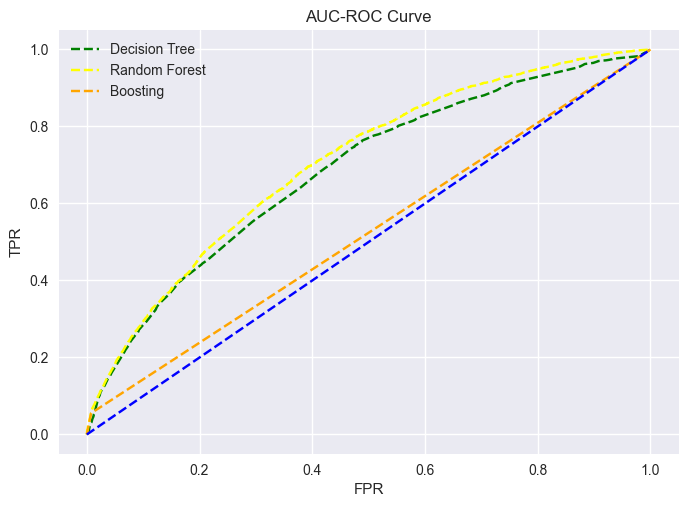

In [66]:
plt.style.use('seaborn')
plt.plot(fpr,tpr,linestyle = '--',color = 'green',label='Decision Tree')
plt.plot(rf_fpr,rf_tpr,linestyle = '--',color = 'yellow',label='Random Forest')
plt.plot(gbc_fpr,gbc_tpr,linestyle = '--',color = 'orange',label='Boosting')
plt.plot(p_fpr,p_tpr,linestyle='--',color = 'blue')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC-ROC Curve')

In [67]:
print('XGBOOST AUC-ROC',metrics.roc_auc_score(y_test,rf_predict))
print('Decision Tree',metrics.roc_auc_score(y_test,y_pred_dtree))
print('Random Forest',metrics.roc_auc_score(y_test,gbc_pred))

XGBOOST AUC-ROC 0.5253823514320684
Decision Tree 0.5284070759066345
Random Forest 0.523842778087145
